In [52]:
# IMPORT EVERYTHING****!!!
from Architectures.AE_ADJ import AE # for some fucking reason importing this makes it not work? (reconstructs everything around the brain somehow)

from Data.load import load,load_middle_slices
from Visualizations.latent_space_projections import pPCA, pTSNE, pUMAP, pISOMAP, pENCODED, plot_multiple_datasets
from Visualizations.plots import plot_middle_slices_in_range, plot_models_training_time, compare_models_loss_history, plot_images, compare_models_reconstruction
from Metrics.metrics_tf import MSE_loss, NMSE_loss, NRMSE_loss, SSIM_loss
from Metrics.metrics import NMSE, SSIM, NRMSE, MSE
from Filters.filters import edge_detect, preprocess_images

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input, AveragePooling2D

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

from keras.saving import register_keras_serializable

from tensorflow.keras import layers, Model, models, Input, activations, regularizers
from skimage.metrics import structural_similarity as ssim

import umap
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns   
import glob
import tensorflow as tf
import tensorflow.keras.backend as K
import time
import math
import nibabel as nib
import json
from tqdm import tqdm

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from scipy.stats import f_oneway, ttest_ind
from Architectures.AE import AE1

In [53]:
# QUICKLY LOAD ALL DATA FROM npy files instead of loading data differently.
groups = {"CN":[],"MCI":[],"AD":[]}
for group in tqdm(groups, "Testing open times"):
    groups[group] = np.load(open(f"Data/D2-{group}-A.npy","br"))

train_test_split = 0.8
split_index = int(len(groups["CN"]) * train_test_split)
H_train2D, H_test2D = groups["CN"][:split_index], groups["CN"][split_index:]
AD_train2D, AD_test2D = groups["AD"][:split_index], groups["AD"][split_index:]
MCI_train2D, MCI_test2D = groups["MCI"][:split_index], groups["MCI"][split_index:]
H_2D = groups["CN"]
AD_2D = groups["AD"]
MCI_2D = groups["MCI"]

Testing open times: 100%|██████████| 3/3 [00:00<00:00, 78.48it/s]


In [87]:
#model = AE.open(r"C:\Users\kiran\Documents\_UiS\sem6\bach\DementiaMRI\AE_ADJ_models\old_images\public_repo\epoch_500\public_repo_autoencoder.keras")
model = AE.open(r"C:\Users\kiran\Documents\_UiS\sem6\bach\DementiaMRI\AE_ADJ_models\public\public_unsupervised_anomaly\epoch_150\public_unsupervised_anomaly_autoencoder.keras")
models_list = [model]

Models loaded and compiled successfully.


In [88]:
%matplotlib inline
#qt

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
(96, 80) (96, 80)


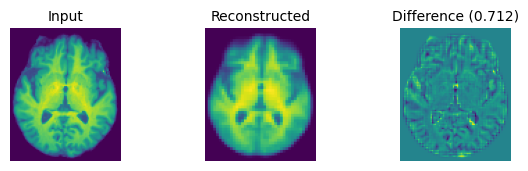

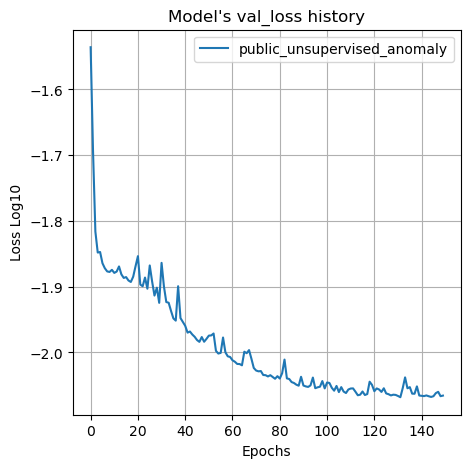

In [89]:
if 'models_list' in locals(): # if the variable exists
    
    images, latent, titles = compare_models_reconstruction(brain_scan_id=0, models_list=models_list, test=H_test2D, loss=SSIM) # remember to update options [test, test2d]
    #print(latent)
    plot_images(images, dimensions=(20,3), fig_size=(6, 30), titles=titles, top_title="")
    
    plot_models_training_time(models_list, fig_size=(2,2))
    compare_models_loss_history(models_list, log10=True, fig_size=(5,5))

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


c:\Users\kiran\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


c:\Users\kiran\anaconda3\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 6 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\kiran\anaconda3\Lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Users\kiran\anaconda3\Lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Users\kiran\anaconda3\Lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Users\kiran\anaconda3\Li

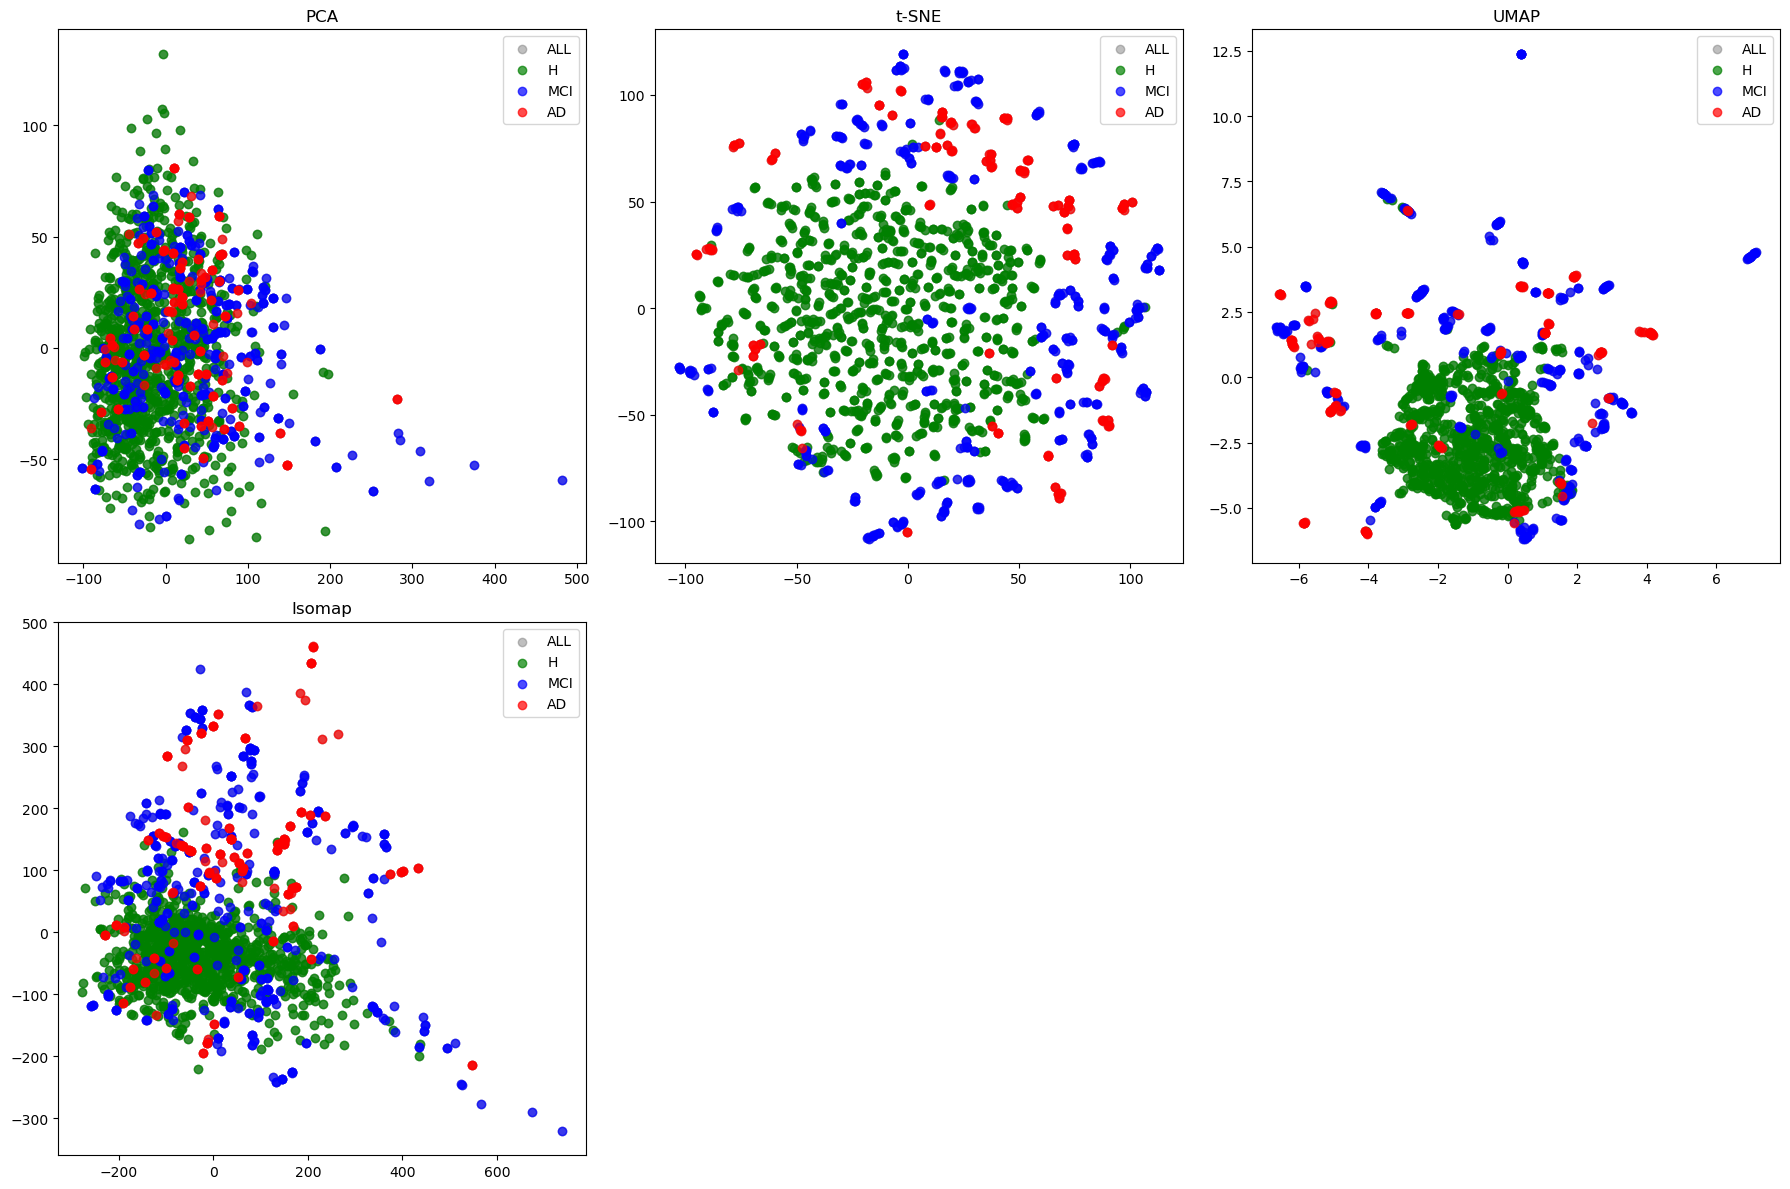

In [90]:
# models_list = [
#     AE.open(r"C:\Users\kiran\Documents\_UiS\sem6\bach\DementiaMRI\AE_ADJ_models\public_repo\epoch_300\public_repo_autoencoder.keras"),
# ]

TwoD = True

if TwoD:
    for m in models_list:
        plot_multiple_datasets(
        model=m,
        plot_functions=[pPCA, pTSNE, pUMAP, pISOMAP], #pENCODED
        datasets=[H_2D, MCI_2D, AD_2D],
        labels=["H", "MCI", "AD"],
        colors=["green", "blue", "red"],#, "green", "blue"],
        titles=["PCA", "t-SNE", "UMAP", "Isomap", "Encoded"])
else:
    for m in models_list:
        plot_multiple_datasets(
        model=m,
        plot_functions=[pPCA, pTSNE, pUMAP, pISOMAP], #pENCODED
        datasets=[H_3D, MCI_3D, AD_3D],
        labels=["H", "MCI", "AD"],
        colors=["green", "blue", "red"],#, "green", "blue"],
        titles=["PCA", "t-SNE", "UMAP", "Isomap", "Encoded"])

In [92]:
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D  # To handle 3D plotting

def pPCA3D(model, datasets, colors, labels, ax, n_components=3, title="PCA Projection"):
    """
    Plots the PCA projection of the encoded representation of the dataset in 3D.
    Applies scaling to all datasets combined, ensuring consistent transformation.

    Parameters:
    - model: The model used for encoding the dataset.
    - datasets: List of datasets to be encoded and projected.
    - colors: List of colors used for the scatter plots.
    - labels: List of labels for the datasets in the legend.
    - ax: The 3D axis on which the plot should be drawn.
    - title: The title for the plot (default is 'PCA Projection').
    """
    # Combine all datasets for consistent scaling
    combined_data = np.concatenate(datasets, axis=0)
    scaler = StandardScaler()
    combined_data_scaled = scaler.fit_transform(combined_data.reshape(-1, combined_data.shape[-1])).reshape(combined_data.shape)
    
    # Get the encoded representation of the combined data
    if model.VAE_model:
        z_mean, z_std, z = model.encoder.predict(combined_data_scaled)
    else:
        z_mean = model.encoder.predict(combined_data_scaled)

    # Apply PCA on the encoded representation
    pca = PCA(n_components=n_components)
    points = pca.fit_transform(z_mean)

    # Plot the PCA projection for all datasets
    start_idx = 0
    for dataset, color, label in zip(datasets, colors, labels):
        end_idx = start_idx + len(dataset)
        ax.scatter(points[start_idx:end_idx, 0], points[start_idx:end_idx, 1], points[start_idx:end_idx, 2], 
                   color=color, label=label, alpha=0.7)
        start_idx = end_idx

    ax.set_title(title)
    ax.legend()
    return points

def pTSNE3D(model, datasets, colors, labels, ax, n_components=3, title="t-SNE Projection", perplexity=5,):
    """
    Plots the t-SNE projection of the encoded representation of the dataset.

    Parameters:
    - model: The model used for encoding the dataset.
    - dataset: The dataset to be encoded and projected.
    - color: The color used for the scatter plot.
    - label: The label for the dataset in the legend.
    - title: The title for the plot (default is 't-SNE Projection').
    - perplexity: The perplexity parameter for t-SNE (default is 5).
    """
    combined_data = np.concatenate(datasets, axis=0)
    scaler = StandardScaler()
    combined_data_scaled = scaler.fit_transform(combined_data.reshape(-1, combined_data.shape[-1])).reshape(combined_data.shape)
    if model.VAE_model:
        z_mean, z_std, z = model.encoder.predict(combined_data_scaled)
    else:
        z_mean = model.encoder.predict(combined_data_scaled)
    tsne = TSNE(n_components=n_components, random_state=42, perplexity=perplexity)
    
    r = tsne.fit_transform(z_mean)

    # Plot the PCA projection for all datasets
    start_idx = 0
    for dataset, color, label in zip(datasets, colors, labels):
        end_idx = start_idx + len(dataset)
        ax.scatter(r[start_idx:end_idx, 0], r[start_idx:end_idx, 1], r[start_idx:end_idx, 2], 
                   color=color, label=label, alpha=0.7)
        start_idx = end_idx

    ax.set_title(title)
    ax.legend()
    return 

def pUMAP3D(model, datasets, colors, labels, ax, n_components=3, title="UMAP Projection"):
    """
    Plots the UMAP projection of the encoded representation of the datasets.
    Applies scaling to all datasets combined, ensuring consistent transformation.

    Parameters:
    - model: The model used for encoding the dataset.
    - datasets: List of datasets to be encoded and projected.
    - colors: List of colors used for the scatter plots.
    - labels: List of labels for the datasets in the legend.
    - ax: The axis on which the plot should be drawn.
    - title: The title for the plot (default is 'UMAP Projection').
    """
    combined_data = np.concatenate(datasets, axis=0)
    scaler = StandardScaler()
    combined_data_scaled = scaler.fit_transform(combined_data.reshape(-1, combined_data.shape[-1])).reshape(combined_data.shape)
    if model.VAE_model:
        z_mean, z_std, z = model.encoder.predict(combined_data_scaled)
    else:
        z_mean = model.encoder.predict(combined_data_scaled)
    umap_model = umap.UMAP(n_components=n_components, random_state=42)
    r = umap_model.fit_transform(z_mean)

    #ax.scatter(umap_results[:, 0], umap_results[:, 1], color="gray", label="ALL", alpha=0.5)

    start_idx = 0
    for dataset, color, label in zip(datasets, colors, labels):
        end_idx = start_idx + len(dataset)
        ax.scatter(r[start_idx:end_idx, 0], r[start_idx:end_idx, 1], r[start_idx:end_idx, 2], 
                   color=color, label=label, alpha=1, s=1)
        start_idx = end_idx

    ax.set_title(title)
    ax.legend()
    return r

fig = plt.figure(figsize=(18, 6 * 1))
ax = fig.add_subplot(111, projection='3d')

r = pUMAP3D(model, [H_2D, MCI_2D, AD_2D], ["green", "blue", "red"], ["H", "MCI", "AD"], ax, 3, "TSNE")

plt.show()


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


c:\Users\kiran\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [86]:
import numpy as np
import matplotlib.pyplot as plt
import umap
from sklearn.preprocessing import StandardScaler

def pUMAP4D(model, datasets, colors, labels, ax, n_components=4, title="UMAP Projection"):
    """
    Plots the UMAP projection of the encoded representation of the datasets.
    Applies scaling to all datasets combined, ensuring consistent transformation.
    Visualizes 4D data using the first 3 components in 3D space and the 4th component as color.

    Parameters:
    - model: The model used for encoding the dataset.
    - datasets: List of datasets to be encoded and projected.
    - colors: List of colors used for the scatter plots.
    - labels: List of labels for the datasets in the legend.
    - ax: The axis on which the plot should be drawn.
    - title: The title for the plot (default is 'UMAP Projection').
    """
    combined_data = np.concatenate(datasets, axis=0)
    scaler = StandardScaler()
    combined_data_scaled = scaler.fit_transform(combined_data.reshape(-1, combined_data.shape[-1])).reshape(combined_data.shape)
    
    # Get the encoded representation of the combined data
    if model.VAE_model:
        z_mean, z_std, z = model.encoder.predict(combined_data_scaled)
    else:
        z_mean = model.encoder.predict(combined_data_scaled)
    
    # Apply UMAP with 4 components
    umap_model = umap.UMAP(n_components=n_components, random_state=42)
    r = umap_model.fit_transform(z_mean)
    
    # Plot the UMAP projection for all datasets
    start_idx = 0
    for dataset, color, label in zip(datasets, colors, labels):
        end_idx = start_idx + len(dataset)
        
        # Use the 4th dimension for color intensity
        ax.scatter(r[start_idx:end_idx, 0], r[start_idx:end_idx, 1], r[start_idx:end_idx, 2], 
                   c=r[start_idx:end_idx, 3], cmap='viridis', label=label, alpha=0.7)
        start_idx = end_idx

    ax.set_title(title)
    ax.legend()
    return r

# Set up a 3D plot
fig = plt.figure(figsize=(18, 6 * 1))
ax = fig.add_subplot(111, projection='3d')

# Call the pUMAP4D function with 3D plotting
pUMAP3D(model, [H_2D, MCI_2D, AD_2D], ["green", "blue", "red"], ["H", "MCI", "AD"], ax, 4, "UMAP Proj 4D")

# Show the plot
plt.show()


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step


c:\Users\kiran\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [98]:
all_images = []
for group in ["D2-CN-A","D2-MCI-A","D2-AD-A"]:
    with open(f"Data/{group}.npy","br") as f:
        images = np.load(f)
    i_start = len(all_images)
    all_images.extend(images)
    print(group, i_start,":",len(all_images))
all_images = np.stack(all_images)
print(all_images.shape)

D2-CN-A 0 : 988
D2-MCI-A 988 : 1403
D2-AD-A 1403 : 1590
(1590, 80, 96)


In [105]:
# Get the encoded representation of the combined data
# datasets = [H_2D, MCI_2D, AD_2D]
# combined_data = np.concatenate(datasets, axis=0)
# 
# if model.VAE_model:
#     z_mean, z_std, z = model.encoder.predict(combined_data)
# else:
#     z_mean = model.encoder.predict(combined_data)


In [106]:
%matplotlib inline
def find_clusters(data, n_clusters=3):
    """
    Perform clustering on MRI latent space data and calculate p-values.
    
    Parameters:
    data (numpy.ndarray): A matrix of shape (n_samples, m_features).
    n_clusters (int): Number of clusters to form.
    
    Returns:
    tuple: Cluster labels for each sample, p-values for samples, p-values for clusters.
    """
    
    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    
    # Calculate p-values for each feature using ANOVA
    p_values_samples = []
    for i in range(data.shape[1]):
        feature_data = [data[labels == cluster, i] for cluster in range(n_clusters)]
        f_stat, p_value = f_oneway(*feature_data)
        p_values_samples.append(p_value)
    
    # # Calculate p-values for clusters using t-test (pairwise comparisons)
    # p_values_clusters = np.ones((n_clusters, n_clusters))
    # for i in range(n_clusters):
    #     for j in range(i+1, n_clusters):
    #         t_stat, p_value = ttest_ind(data[labels == i], data[labels == j], equal_var=False)
    #         print(p_value)
    #         p_values_clusters[i, j] = p_value
    #         p_values_clusters[j, i] = p_value
    
    return labels, np.array(p_values_samples)#, p_values_clusters

def plot_clusters(data, labels, n_clusters=3, title='t-SNE Visualization of Clusters'):
    """
    Plot the clusters using t-SNE for 2D visualization.

    Parameters:
    data (numpy.ndarray): A matrix of shape (n_samples, m_features).
    labels (numpy.ndarray): Cluster labels for each sample.
    n_clusters (int): Number of clusters.
    """
    tsne = TSNE(n_components=2, random_state=42)
    data_2d = tsne.fit_transform(data)

    # Calculate cluster means
    cluster_means = np.array([data_2d[labels == i].mean(axis=0) for i in range(n_clusters)])

    # Plot using seaborn for better aesthetics
    plt.figure(figsize=(10, 8))
    palette = sns.color_palette('husl', n_clusters)
    for i in range(n_clusters):
        plt.scatter(data_2d[labels == i, 0], data_2d[labels == i, 1], label=f'Cluster {i}', color=palette[i], s=50)
        plt.scatter(cluster_means[i, 0], cluster_means[i, 1], color=palette[i], s=3500, alpha=0.3)

    # plt.legend()
    plt.title(title)
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()

# Example usage (with random data)
# data = np.random.rand(100, 10)
#for n_clusters in [2,4, 8, 12]:
#    labels, p_values_samples = find_clusters(z_mean, n_clusters=n_clusters)
#    plot_clusters(z_mean, labels, n_clusters=n_clusters,title=f't-SNE Visualization of {n_clusters} Clusters')


In [104]:
#labels_nat = np.zeros(len(latent))
#labels_nat[988 : 1403]=1
#labels_nat[1403 : 1590]=2
#plot_clusters(latent, labels_nat, n_clusters=3,title='t-SNE Visualization of Natural Clustering (Diagnoses)')

In [103]:
from sklearn.cluster import KMeans

scaler = StandardScaler()
combined_data_scaled = scaler.fit_transform(combined_data.reshape(-1, combined_data.shape[-1])).reshape(combined_data.shape)
    
# Apply KMeans clustering in the latent space
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(combined_data_scaled)

# Plot with the cluster labels
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
ax.set_title('PCA with KMeans Clusters')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.legend(*scatter.legend_elements(), title="Clusters")
plt.show()


ValueError: Found array with dim 3. KMeans expected <= 2.